In [1]:
using Pkg

In [4]:
using CSV
using DataFrames

In [3]:
Pkg.installed()

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\Pkg\src\Pkg.jl:566


Dict{String, VersionNumber} with 20 entries:
  "CSV"            => v"0.8.4"
  "ClassImbalance" => v"0.8.1"
  "GR"             => v"0.57.4"
  "StatsPlots"     => v"0.14.20"
  "JSONTables"     => v"1.0.1"
  "ScikitLearn"    => v"0.6.2"
  "Lathe"          => v"0.0.9"
  "StatsBase"      => v"0.32.2"
  "Tables"         => v"1.4.2"
  "IJulia"         => v"1.23.2"
  "Plots"          => v"1.14.0"
  "PyPlot"         => v"2.9.0"
  "ROCAnalysis"    => v"0.3.2"
  "Gadfly"         => v"1.2.1"
  "DataFrames"     => v"0.20.2"
  "UnicodePlots"   => v"1.3.0"
  "Pandas"         => v"1.4.0"
  "GLM"            => v"1.4.2"
  "MLBase"         => v"0.8.0"
  "Seaborn"        => v"0.4.1"

In [6]:
dataset = CSV.read("../../JuliaDataset/sales.csv", DataFrame)

,Promote,Sales
,Int64,Int64
1,23,554
2,56,1339
3,34,815
4,25,609
5,67,1600
6,82,2000
7,46,1000
8,14,300
9,6,150


In [7]:
X = dataset[:Promote]

19-element Vector{Int64}:
 23
 56
 34
 25
 67
 82
 46
 14
  6
 47
 52
 88
 71
 78
 66
 44
 68
 90
 22

In [9]:
Y = dataset[:Sales]

19-element Vector{Int64}:
  554
 1339
  815
  609
 1600
 2000
 1000
  300
  150
 1150
 1200
 2000
 1750
 2000
 1500
 1000
 1600
 2000
  550

In [10]:
using Plots

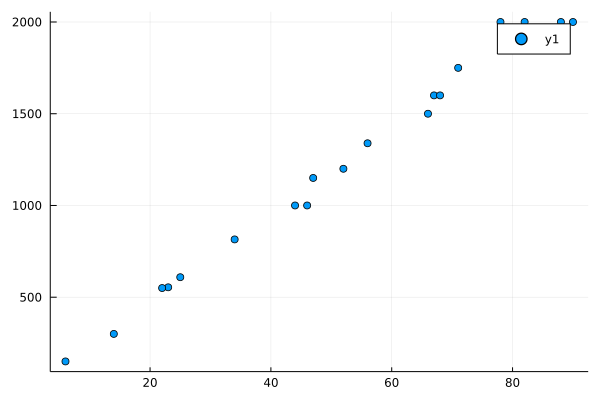

In [11]:
scatter(dataset.Promote, dataset.Sales)

In [25]:
using Statistics

In [26]:
m = sum((X .- mean(X)) .* (Y .- mean(Y))) / sum((X .- mean(X)) .* (X .- mean(X)))

23.50640302155077

In [28]:
c = mean(Y) - m .* mean(X);

In [29]:
m, c

(23.50640302155077, 5.485865363252515)

In [ ]:
Sales = m*promote + c

In [31]:
23.5*50+5.48

1180.48

## Method 2

In [33]:
names(dataset)

2-element Vector{Symbol}:
 :Promote
 :Sales

In [32]:
using GLM

In [34]:
ols = lm(@formula(Sales ~ Promote) , dataset)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Sales ~ 1 + Promote

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)   5.48587   34.718      0.16    0.8763   -67.7627    78.7344
Promote      23.5064     0.606353  38.77    <1e-17    22.2271    24.7857
────────────────────────────────────────────────────────────────────────

In [37]:
predict(ols, DataFrame(Promote= [50]))

1-element Vector{Union{Missing, Float64}}:
 1180.8060164407912